# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Correlation
### VIDEO: Kendall correlation
#### TEACHER: Mike X Cohen, sincxpress.com

In [2]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

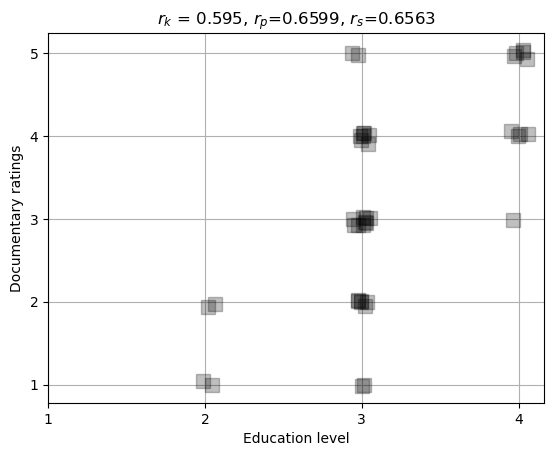

In [3]:
## generate some data!

# Ex: correlate whether people with high education like documentaries

N = 40 # movie/documentary ratings from 40 people

# movie ratings
docuRatings = np.random.randint(low=1,high=6,size=N) # on a scale from 1 to 6, gen 40 data points.

# education level (1-4, correlated with docuRatings)
eduLevel = np.ceil( (docuRatings + np.random.randint(low=1,high=5,size=N) )/9 * 4 ) # arbitrary forumla to correlate ratings with education level

# compute the correlations - 3 types Kendall tau, Pearson and Spearman
cr = [0,0,0]
cr[0] = stats.kendalltau(eduLevel,docuRatings)[0]
cr[1] = stats.pearsonr(eduLevel,docuRatings)[0]
cr[2] = stats.spearmanr(eduLevel,docuRatings)[0]

# round for convenience
cr = np.round(cr,4)


# plot the data - compare the 3 types of correlations
# note we use random offsets to the x and y coords so they don't look like one point (because they are just stacked on top of each other)
plt.plot(eduLevel+np.random.randn(N)/30,docuRatings+np.random.randn(N)/30,'ks',markersize=10,markerfacecolor=[0,0,0,.25])
plt.xticks(np.arange(4)+1)
plt.yticks(np.arange(5)+1)
plt.xlabel('Education level')
plt.ylabel('Documentary ratings')
plt.grid()
plt.title('$r_k$ = %g, $r_p$=%g, $r_s$=%g'%(cr[0],cr[1],cr[2]))
# note how the kendall correlation is lower than the spearman and pearson correlations
plt.show()

In [4]:
## correlation estimation errors under H0

numExprs = 1000
nValues = 50 # sample size is 50
nCategories = 6

c = np.zeros((numExprs,3))

# run 1000 repeated generations
for i in range(numExprs):
    
    # create data - there is no relationship and they would only be correlated by chance
    x = np.random.randint(low=0,high=nCategories,size=nValues) # random ints from 0 to 6, and sample size of 50
    y = np.random.randint(low=0,high=nCategories,size=nValues)
    
    # store correlations - 3 types - for each iteration of the test
    c[i,:] = [ stats.kendalltau(x,y)[0],
               stats.pearsonr(x,y)[0],
               stats.spearmanr(x,y)[0] ]
    
# since there is no built in relationship to the random data generated, we expect a correlation of 0.
# we can compare the different types of correlations and see how far they are from zero 
  # to determine which method introduces the most bias (has the least estimation error)
    
print(c)  # the cols correspond to Kendall | Pearson | Spearman r values, the rows are the iteration

[[-0.05151778 -0.038516   -0.06492214]
 [-0.01761283 -0.03275461 -0.01803486]
 [-0.18545899 -0.21708944 -0.23516745]
 ...
 [ 0.08387229  0.09579548  0.09559483]
 [ 0.03120459  0.02912789  0.03417771]
 [-0.06542969 -0.07317315 -0.08986027]]


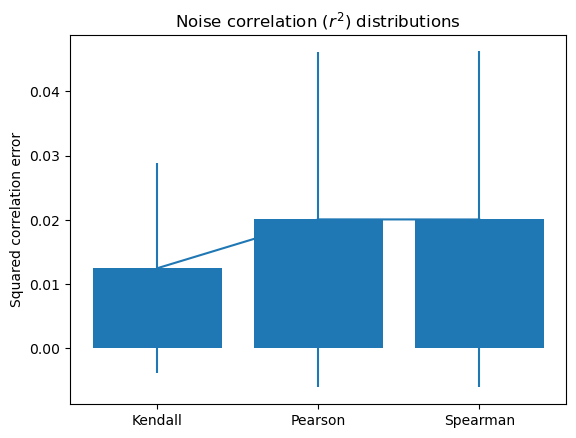

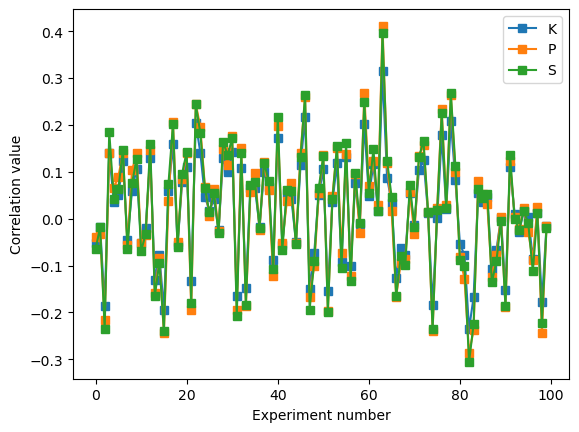

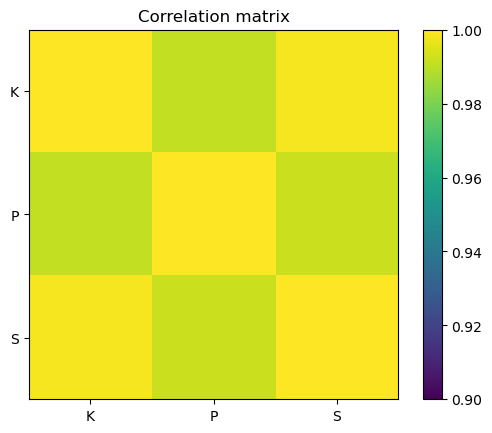

In [5]:
## show the graphs

# bar graph with error bars
# we plot the mean and the std dev
plt.bar(range(3),np.mean(c**2,axis=0)) # we square the values because we only care about how close it is to zero (not whether it's positive/negative)
plt.errorbar(range(3),np.mean(c**2,axis=0),yerr=np.std(c**2,ddof=1,axis=0))
plt.xticks(range(3),('Kendall','Pearson','Spearman'))
plt.ylabel('Squared correlation error')
plt.title('Noise correlation ($r^2$) distributions')
plt.show()
# the squared correlation error on the y-axis means how far it is from zero
# this should show that the kendall correlation is giving the least amount of estimation error (the blue square area is smaller than the other correlation plots)
# also should show that there is the least amount of variance compared to the other two (the vertical blue lines)

# NOTE: how though the kendall looks different, when you take into account the magnitude of difference, 
# it is very small compared to the others and they're all basically the same.
# But two cells up (where we imposed a relationship) we do see a more significant distinction when comparing kendall r to the other two. 
# So the discrepancy may have something to do with the size of the correlation

## Pearson's coefficient is close to Kendall's coefficient around zero and plus / minus one.

# see https://www.udemy.com/course/statsml_x/learn/lecture/20025134#questions/14995136
# One conclusion we can draw here, in context of the goal of this exercise ("does K vs. P matter?") is 
# that it doesn't matter at the "extremes" of very strong (close to |1|) or very weak (close to 0) 
# relationships, but using the correct formula does matter for moderate relationships 
# (which will be the case in most real-world applications).

# This plot helps show whether the different correlation methods converge on the same values
# we show the first 100 iterations out of the thousand and plot them over each other (for the kendall/pearson/spearman r)
plt.plot(c[:100,:],'s-')
plt.xlabel('Experiment number')
plt.ylabel('Correlation value')
plt.legend(('K','P','S'))
plt.show()
# note how all three of the plots go up and down

# plot the correlation matrices to compare the r values produced from each method against each other.
plt.imshow(np.corrcoef(c.T),vmin=.9,vmax=1)
plt.xticks(range(3),['K','P','S'])
plt.yticks(range(3),('K','P','S'))
plt.colorbar()
plt.title('Correlation matrix')
plt.show()
# should show that they are not much different from each other.
# The different correlations (r values resulting from the different methods) are similar and not far apart from each other.